In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("exp1-16-10.csv", delim_whitespace=True)
df["graph"] = df["graph"].str.split("/").str[-1]
df["time (ms)"] = df["time"]
df["time per node (ns)"] = df["time"] / df["num_nodes"] * 10**6
df["time per edge (ns)"] = df["time"] / df["num_edges"] * 10**6
df["construction time per node (ns)"] = df["construction_time"] / df["num_nodes"] * 10**6
df["construction time per edge (ns)"] = df["construction_time"] / df["num_edges"] * 10**6
df.head()

,task,graph,num_nodes,num_edges,num_threads,construction_time,time,time (ms),time per node (ns),time per edge (ns),construction time per node (ns),construction time per edge (ns)
0,a,1e1x-1e4-2.graph,100000,100000,1,0.202949,7.38234,7.38234,73.8234,73.8234,2.02949,2.02949
1,a,1e1x-1e4-2.graph,100000,100000,1,0.031543,6.54655,6.54655,65.4655,65.4655,0.31543,0.31543
2,a,1e1x-1e4-2.graph,100000,100000,1,0.031404,6.84547,6.84547,68.4547,68.4547,0.31404,0.31404
3,a,1e1x-1e4-2.graph,100000,100000,1,0.031310,6.90564,6.90564,69.0564,69.0564,0.31310,0.31310
4,a,1e1x-1e4-2.graph,100000,100000,1,0.031478,6.89830,6.89830,68.9830,68.9830,0.31478,0.31478


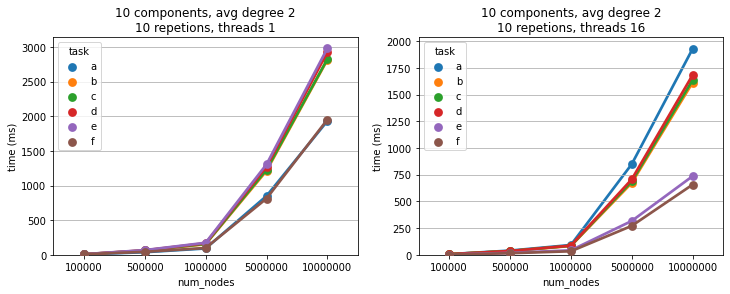

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for ax, num_threads in zip(axes, (1, 16)):
    data = df[df["num_threads"] == num_threads]
    ax.set_ylim((0, data["time (ms)"].max() * 1.05))
    ax.grid(True)
    ax.set_title(f"10 components, avg degree 2\n10 repetions, threads {num_threads}")
    sns.pointplot(x="num_nodes", y="time (ms)", hue="task", data=data, ax=ax)
plt.savefig(f"exp1-time.pdf", dpi=300)
plt.show()

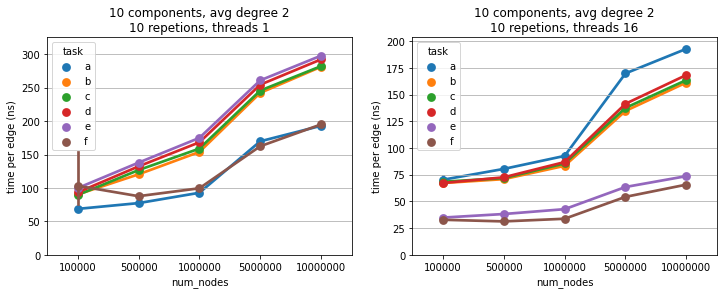

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for ax, num_threads in zip(axes, (1, 16)):
    data = df[df["num_threads"] == num_threads]
    ax.set_ylim((0, data["time per edge (ns)"].max() * 1.05))
    ax.grid(True)
    ax.set_title(f"10 components, avg degree 2\n10 repetions, threads {num_threads}")
    sns.pointplot(x="num_nodes", y="time per edge (ns)", hue="task", data=data, ax=ax)
plt.savefig(f"exp1-time-per-edge.pdf", dpi=300)
plt.show()

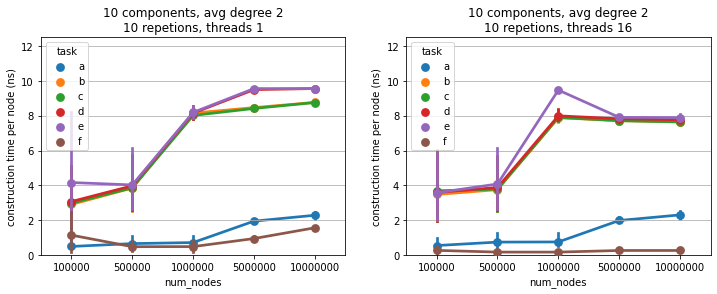

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for ax, num_threads in zip(axes, (1, 16)):
    data = df[df["num_threads"] == num_threads]
    ax.set_ylim((0, 12.5))
    ax.grid(True)
    ax.set_title(f"10 components, avg degree 2\n10 repetions, threads {num_threads}")
    sns.pointplot(x="num_nodes", y="construction time per node (ns)", hue="task", data=data, ax=ax)
plt.savefig(f"exp1-time-construction-per-node.pdf", dpi=300)
plt.show()